# GE stack overview
Demonstrate decorators and callouts in one layout.

Expected output: a two-layer GE grid with a boxed entry and a single callout.

Note: pivot boxes and row-echelon paths are typically generated by the client
(e.g., a trace builder). This notebook omits those fields to avoid
hand-constructed coordinates.

Matrix names follow the default naming scheme (A0, E1, A1, ...).


In [1]:
import sympy as sym
from IPython.display import SVG, display
from matrixlayout.ge import grid_svg
from matrixlayout.formatting import decorator_box, sel_entry

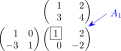

In [2]:
A0 = sym.Matrix([[1, 2], [3, 4]])
E1 = sym.Matrix([[1, 0], [-3, 1]])
A1 = E1 * A0
matrices = [[None, A0], [E1, A1]]

decorators = [
    {"grid": (1, 1), "entries": [sel_entry(0, 0)], "decorator": decorator_box()},
]

callouts = [
    {"name": "A1", "label": r"$A_1$", "math_mode": False, "anchor": "top", "angle_deg": -35, "length_mm": 8},
]

svg = grid_svg(
    matrices=matrices,
    decorators=decorators,
    callouts=callouts,
)
display(SVG(svg))


## Client-side example (la_figures)
If you use la_figures, it will generate pivots and row-echelon paths
for you as part of the layout spec.

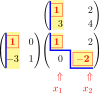

In [3]:
try:
    import la_figures
except Exception as exc:
    print(f"la_figures not available: {exc}")
else:
    import sympy as sym
    from IPython.display import SVG, display
    from matrixlayout.ge import grid_svg

    A = sym.Matrix([[1, 2], [3, 4]])
    spec = la_figures.ge_tbl_spec(A, show_pivots=True)
    svg = grid_svg(**spec)
    display(SVG(svg))

## Troubleshooting
If rendering fails, set `output_dir` and inspect the emitted TeX.